# L15 - Model evaluation 2 (holdout)

---


- Instructor: Dalcimar Casanova (dalcimar@gmail.com)
- Course website: https://www.dalcimar.com/disciplinas/aprendizado-de-maquina
- Bibliography: based on lectures of Dr. Sebastian Raschka

In [10]:
import numpy as np
import matplotlib.pyplot as plt

## Pessimistic Bias in Holdout

The following experiments further illustrate the issue of the pessimistic bias of the generalization performance estimates using learning curves. Here, the same test set is used while a model is fit on training sets with different sizes.

In [11]:
from mlxtend.data import mnist_data
from sklearn.model_selection import train_test_split


X2, y2 = mnist_data()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,
                                                        test_size=0.3, 
                                                        random_state=12,
                                                        stratify=y2)
print('Number of train examples:', y_train2.shape[0])
print('Number of test examples:', y_test2.shape[0])
print('Labels:', y_train2)

Number of train examples: 3500
Number of test examples: 1500
Labels: [8 8 7 ... 6 9 8]


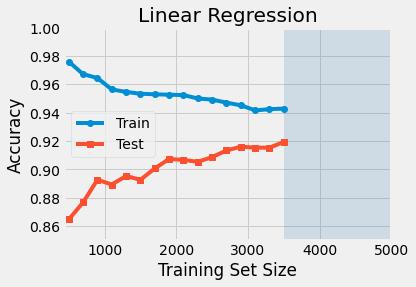

In [12]:
from sklearn.linear_model import LogisticRegression

clf_2 = LogisticRegression(penalty='l2', 
                           dual=False, 
                           tol=0.0001, 
                           C=0.000001, 
                           fit_intercept=True, 
                           intercept_scaling=1, 
                           class_weight=None, 
                           random_state=12, 
                           solver='lbfgs', 
                           max_iter=1000, 
                           multi_class='multinomial', 
                           verbose=0, 
                           warm_start=False, 
                           n_jobs=1)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)
    
    
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0], 
                X_train2.shape[0] + X_test2.shape[0], 
                alpha=0.2, 
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.title("Linear Regression")
    #plt.savefig('figures/model-eval-mnist_0.svg')

As it can be seen, the model is likely benefitting from more training data.

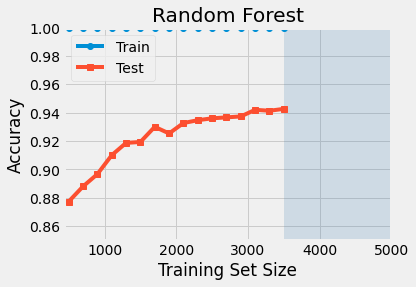

In [14]:
from sklearn.ensemble import RandomForestClassifier


clf_2 = RandomForestClassifier(n_estimators=100, random_state=123)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)
    
    
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0], 
                X_train2.shape[0] + X_test2.shape[0], 
                alpha=0.2, 
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.title("Random Forest")
    #plt.savefig('figures/model-eval-mnist_0.svg')

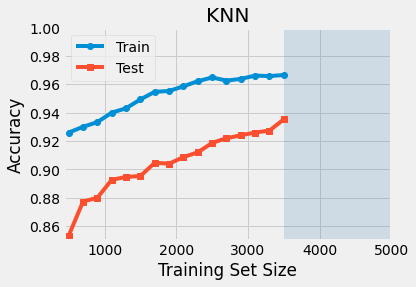

In [15]:
from sklearn.neighbors import KNeighborsClassifier


clf_2 = KNeighborsClassifier(n_neighbors=3)

pred_train, pred_test = [], []

intervals = np.arange(500, X_train2.shape[0] + 1, 200)

for i in intervals:
    clf_2.fit(X_train2[:i], y_train2[:i])
    p_train = clf_2.score(X_train2[:i], y_train2[:i])
    p_test = clf_2.score(X_test2, y_test2)
    pred_train.append(p_train)
    pred_test.append(p_test)
    
    
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train')
    plt.plot(intervals, pred_test, marker='s', label='Test')
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train2.shape[0] + X_test2.shape[0]])
    plt.axvspan(X_train2.shape[0], 
                X_train2.shape[0] + X_test2.shape[0], 
                alpha=0.2, 
                color='steelblue')
    plt.ylim([0.85, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    plt.title("KNN")
    #plt.savefig('figures/model-eval-mnist_0.svg')

<br>
<br>
<br>